<a href="https://colab.research.google.com/github/shiuli-19/22BCE0342-BCSE206L-Project/blob/main/notebooks/Gnu_Octave.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [22]:
# Install Octave once per session
!apt-get install -y octave
!octave --eval "pkg install -forge statistics"
!octave --eval "pkg load statistics"


Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
octave is already the newest version (6.4.0-2).
0 upgraded, 0 newly installed, 0 to remove and 41 not upgraded.
octave: X11 DISPLAY environment variable not set
octave: disabling GUI features
error: the following dependencies were unsatisfied:
   statistics needs octave >= 8.1.0
octave: X11 DISPLAY environment variable not set
octave: disabling GUI features
error: package statistics is not installed
error: called from
    load_packages at line 47 column 7
    pkg at line 588 column 7


In [19]:
!pip install -q octave-kernel


In [26]:
%%writefile analysis.m
% ==============================================================
% GSS7402 Data Analysis in GNU Octave (Headless version for Colab)
% ==============================================================

clc; clear; close all;

% 1️⃣ Load dataset
data = csvread("GSS7402_cleaned.csv", 1, 0);  % Skip header row

% 2️⃣ Extract relevant columns
kids       = data(:,1);
education  = data(:,3);
ethnicity  = data(:,7);

% 3️⃣ Central Tendency & Dispersion
mean_kids = mean(kids);
median_kids = median(kids);
std_kids = std(kids);
var_kids = var(kids);

printf("Mean Kids: %.2f\n", mean_kids);
printf("Median Kids: %.2f\n", median_kids);
printf("Std Dev Kids: %.2f\n", std_kids);
printf("Variance Kids: %.2f\n", var_kids);

% 4️⃣ Histogram of Kids
figure(1, "visible", "off");
hist(kids, 10);
title("Histogram of Number of Kids");
xlabel("Kids");
ylabel("Frequency");
print("hist_kids.png", "-dpng");

% 5️⃣ Scatter Plot: Kids vs Education
figure(2, "visible", "off");
scatter(education, kids, 25, "filled");
title("Scatter: Kids vs Education");
xlabel("Education (Years)");
ylabel("Kids");
grid on;
print("scatter_kids_education.png", "-dpng");

% 6️⃣ Manual Boxplot: Kids grouped by Ethnicity
figure(3, "visible", "off");
hold on;
eth_groups = unique(ethnicity);
colors = ["r", "b", "g", "m", "c"];
for i = 1:length(eth_groups)
  grp = kids(ethnicity == eth_groups(i));
  x = i * ones(size(grp));
  scatter(x, grp, 10, colors(mod(i, length(colors))+1), "filled");
endfor
title("Kids by Ethnicity (Simulated Boxplot)");
xlabel("Ethnicity Code");
ylabel("Kids");
grid on;
print("boxplot_kids_ethnicity.png", "-dpng");

% 7️⃣ Correlation
corr_val = corr(kids, education);
printf("Correlation (Kids–Education): %.4f\n", corr_val);

printf("\n✅ Analysis complete. PNGs saved in Colab workspace.\n");




Overwriting analysis.m


In [27]:
!octave analysis.m


octave: X11 DISPLAY environment variable not set
octave: disabling GUI features
Mean Kids: 4560.50
Median Kids: 4560.50
Std Dev Kids: 2632.86
Variance Kids: 6931960.00

The gnuplot graphics toolkit is not actively maintained and has a number
of limitations that are ulikely to be fixed.  Communication with gnuplot
uses a one-directional pipe and limited information is passed back to the
Octave interpreter so most changes made interactively in the plot window
will not be reflected in the graphics properties managed by Octave.  For
example, if the plot window is closed with a mouse click, Octave will not
be notified and will not update it's internal list of open figure windows.
We recommend using the qt toolkit instead.
Correlation (Kids–Education): 0.0209

✅ Analysis complete. PNGs saved in Colab workspace.


Mean Kids: 4560.50
Median Kids: 4560.50
Std Dev Kids: 2632.86
Variance Kids: 6931960.00


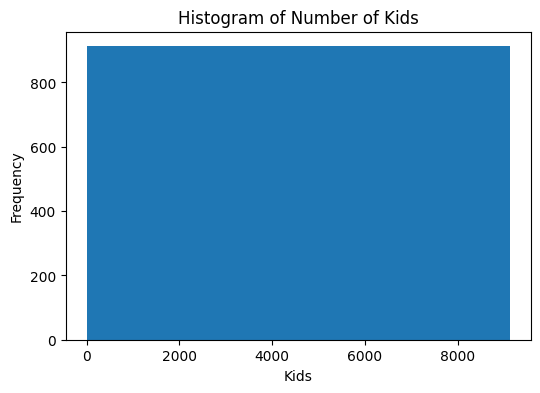

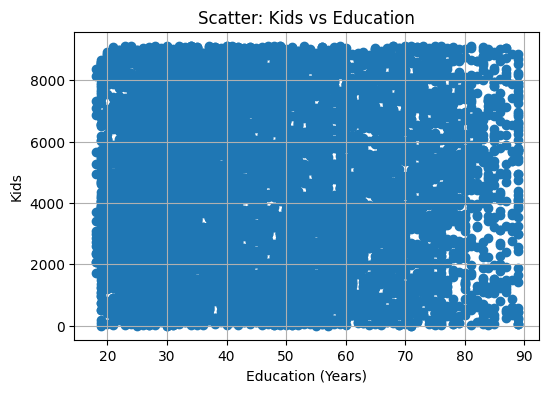

<Figure size 600x400 with 0 Axes>

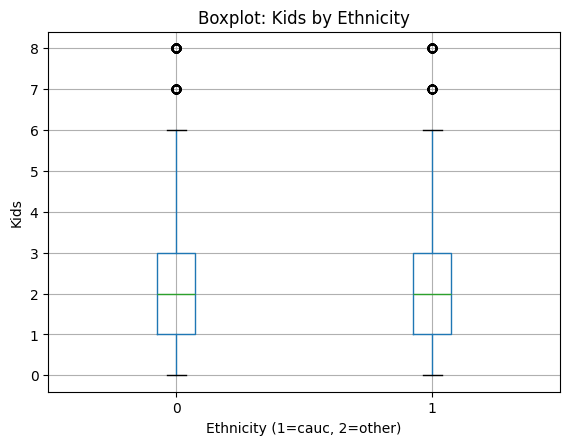

Correlation Kids–Education: 0.021


In [16]:
import pandas as pd
import matplotlib.pyplot as plt

# Load data
data = pd.read_csv("GSS7402_cleaned.csv")

# Assuming columns: kids, age, education, year, siblings, agefirstbirth, ethnicity
kids = data.iloc[:, 0]
education = data.iloc[:, 2]
ethnicity = data.iloc[:, 6]  # adjust if needed

# Central tendency & dispersion
print(f"Mean Kids: {kids.mean():.2f}")
print(f"Median Kids: {kids.median():.2f}")
print(f"Std Dev Kids: {kids.std():.2f}")
print(f"Variance Kids: {kids.var():.2f}")

# Histogram
plt.figure(figsize=(6,4))
plt.hist(kids, bins=10)
plt.title("Histogram of Number of Kids")
plt.xlabel("Kids")
plt.ylabel("Frequency")
plt.savefig("hist_kids.png")
plt.show()

# Scatter plot
plt.figure(figsize=(6,4))
plt.scatter(education, kids)
plt.title("Scatter: Kids vs Education")
plt.xlabel("Education (Years)")
plt.ylabel("Kids")
plt.grid(True)
plt.savefig("scatter_kids_education.png")
plt.show()

# Boxplot
plt.figure(figsize=(6,4))
data.boxplot(column='kids', by='ethnicity')
plt.title("Boxplot: Kids by Ethnicity")
plt.suptitle("")
plt.xlabel("Ethnicity (1=cauc, 2=other)")
plt.ylabel("Kids")
plt.savefig("boxplot_kids_ethnicity.png")
plt.show()

# Correlation
corr = kids.corr(education)
print(f"Correlation Kids–Education: {corr:.3f}")
